In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
import pandas as pd
import numpy as np
import seaborn               as sns
from wordcloud import WordCloud, STOPWORDS

In [2]:
df=pd.read_excel('Clustering.xlsx')  
df.head(5)

,DRG,PCCR_OR_and_Anesth_Costs
0,20,21805.857143
1,21,15172.533333
2,22,9857.000000
3,23,17395.568182
4,24,11151.166667


Text(0, 0.5, '')

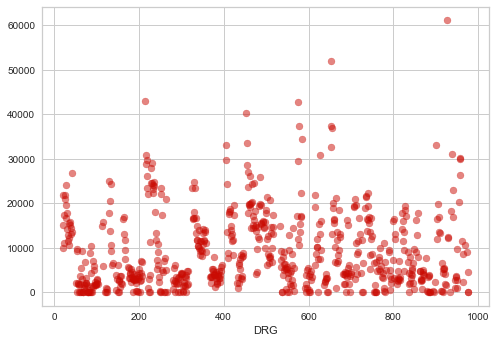

In [3]:
fig=plt.scatter(df.iloc[:, 0] , df.iloc[:, 1], color='r',alpha=0.5 )
plt.xlabel('DRG')
plt.ylabel('Average cost')
plt.ylabel('')

1425.3079860059418


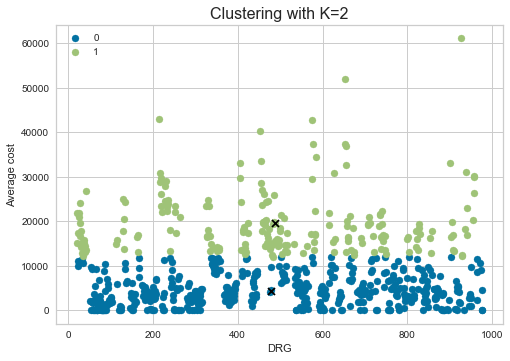

In [196]:
# two clusters
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)
kmeans = KMeans(n_clusters=2).fit(scaled_features)
label = kmeans.fit_predict(df)
kmeans.cluster_centers_
print(calinski_harabasz_score(df, label))
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df.iloc[label == i , 0] , df.iloc[label == i , 1] , label = i)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', marker='x')
plt.xlabel('DRG')
plt.ylabel('Average cost')
plt.title("Clustering with K=2",fontsize=16)

plt.legend()
plt.show()

1715.3798095821749


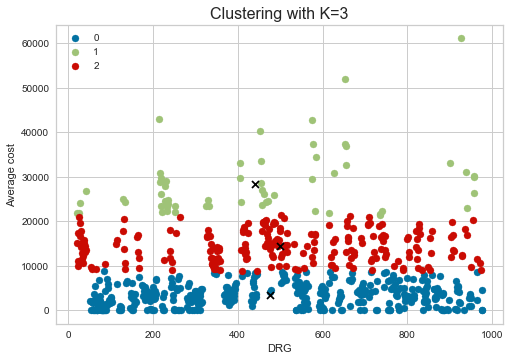

In [4]:
# three clusters
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)
kmeans = KMeans(n_clusters=3).fit(scaled_features)
label = kmeans.fit_predict(df)
kmeans.cluster_centers_
print(calinski_harabasz_score(df, label))
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df.iloc[label == i , 0] , df.iloc[label == i , 1] , label = i)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', marker='x')
plt.legend()
plt.xlabel('DRG')
plt.ylabel('Average cost')
plt.title("Clustering with K=3",fontsize=16)
plt.show()



In [6]:
df['Clusters']=label
d={1: 'High-cost', 0: 'Low-cost', 2: 'Mid-cost'}
df.Clusters=df.Clusters.map(d)
df.head()
df.to_excel("Output1.xlsx")

1958.5210764143994


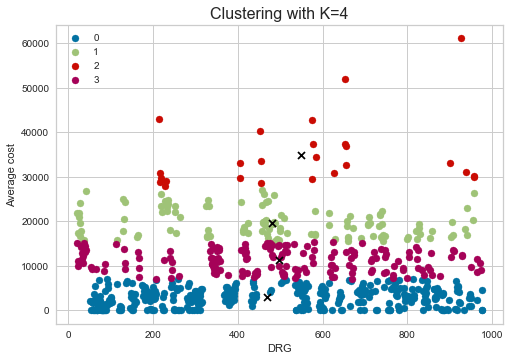

In [198]:
# four clusters
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)
kmeans = KMeans(n_clusters=4).fit(scaled_features)
label = kmeans.fit_predict(df)
kmeans.cluster_centers_
print(calinski_harabasz_score(df, label))
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df.iloc[label == i , 0] , df.iloc[label == i , 1] , label = i)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', marker='x')
plt.xlabel('DRG')
plt.ylabel('Average cost')
plt.title("Clustering with K=4",fontsize=16)
plt.legend()
plt.show()

2161.6199775228083


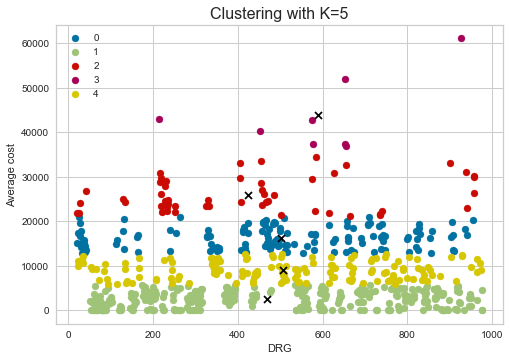

In [200]:
# five clusters
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)
kmeans = KMeans(n_clusters=5).fit(scaled_features)
label = kmeans.fit_predict(df)
print(calinski_harabasz_score(df, label))
kmeans.cluster_centers_
#Getting unique labels
u_labels = np.unique(label)
#plotting the results:
for i in u_labels:
    plt.scatter(df.iloc[label == i , 0] , df.iloc[label == i , 1] , label = i)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', marker='x')
plt.xlabel('DRG')
plt.ylabel('Average cost')
plt.title("Clustering with K=5",fontsize=16)
plt.legend()
plt.show()

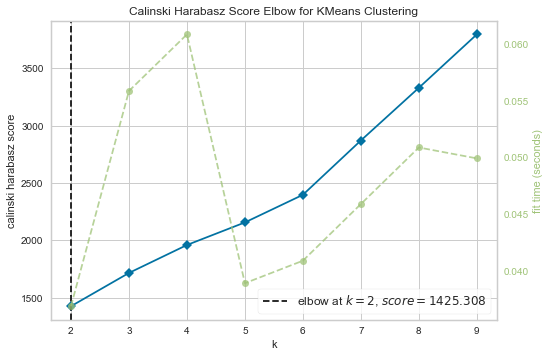

In [190]:
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10),metric='calinski_harabasz', timings= True)
visualizer.fit(df)        # Fit the data to the visualizer
visualizer.show()  

In [134]:
d={1: 'High-cost', 2: 'Low-cost', 0: 'Mid-cost'}
df.Prediction=df.Prediction.map(d)
df.head()

,X,Y,Prediction
0,20,21805.8571,High-cost
1,21,15172.5333,Mid-cost
2,22,9857.0000,Mid-cost
3,23,17395.5682,Mid-cost
4,24,11151.1667,Mid-cost


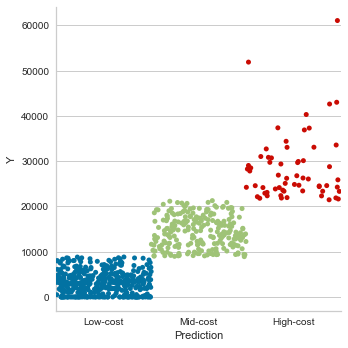

In [135]:
sns.catplot( x="Prediction", y="Y", data=df,kind='strip',jitter='0.5',order=['Low-cost','Mid-cost','High-cost'])

In [118]:
df1=pd.read_excel('Output1.xlsx') 
df1.head()

,DRG,PCCR_OR_and_Anesth_Costs,Clusters
0,Intracranial vascular procedures w_PDX hemorrh...,21805.857143,High-cost
1,Intracranial vascular procedures w_PDX hemorrh...,15172.533333,Mid-cost
2,Intracranial vascular procedures w_PDX hemorrh...,9857.000000,Mid-cost
3,Cranio w_major dev impl/acute complex CNS PDX ...,17395.568182,Mid-cost
4,Cranio w_major dev impl/acute complex CNS PDX ...,11151.166667,Mid-cost


In [119]:
lowcost=df1.loc[df1['Clusters'] == 'Low-cost']
lowcost.head()

,DRG,PCCR_OR_and_Anesth_Costs,Clusters
23,Spinal disorders & injuries w_CC/MCC,2025.000000,Low-cost
24,Spinal disorders & injuries w/o_CC/MCC,0.000000,Low-cost
27,Degenerative nervous system disorders w_MCC,2095.333333,Low-cost
28,Degenerative nervous system disorders w/o_MCC,1921.566667,Low-cost
29,Multiple sclerosis & cerebellar ataxia w_MCC,0.000000,Low-cost


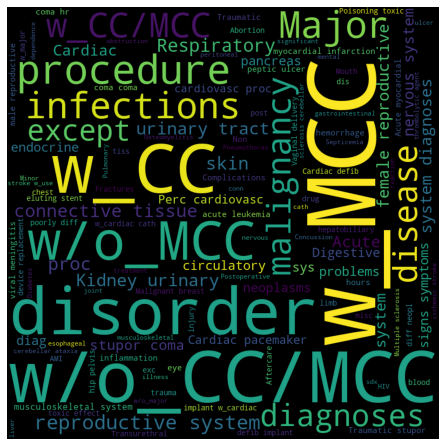

In [120]:
# iterate through the csv file
wordcloud = WordCloud(width = 800, height = 800,
                min_font_size = 10, regexp=r"\w[\w/]+").generate(' '.join(lowcost['DRG']))
  
# plot the WordCloud image                       
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [121]:
from collections import Counter
results = Counter()
lowcost['DRG'].str.split().apply(results.update)
print(results)

Counter({'&': 136, 'w_MCC': 128, 'w/o_CC/MCC': 85, 'w_CC': 77, 'disorders': 60, 'w/o_MCC': 46, 'of': 46, 'system': 45, 'Other': 40, 'or': 25, 'diagnoses': 25, 'procedures': 18, 'w_CC/MCC': 17, 'Acute': 16, 'infections': 16, 'Major': 16, 'Cardiac': 16, 'proc': 15, 'except': 15, 'reproductive': 14, 'tract': 13, 'tissue': 12, 'nervous': 11, 'leukemia': 11, 'O.R.': 10, 'urinary': 10, 'the': 9, 'malignancy': 9, 'Respiratory': 9, 'disease': 9, 'diag': 9, 'Disorders': 9, 'musculoskeletal': 9, 'female': 9, 'trauma': 8, 'for': 8, 'connective': 8, 'stupor': 7, 'coma': 7, 'Traumatic': 7, 'failure': 7, 'implant': 7, 'cath': 7, 'dis': 7, 'Kidney': 7, 'sys': 6, 'exc': 6, 'neoplasms': 6, 'symptoms': 6, 'pacemaker': 6, 'Perc': 6, 'cardiovasc': 6, 'stent': 6, 'infarction,': 6, 'G.I.': 6, 'pancreas': 6, 'problems': 6, 'breast': 6, 'as': 6, 'agent': 5, 'hemorrhage': 5, 'Nonspecific': 5, 'meningitis': 5, 'coma,': 5, 'hr': 5, 'eye': 5, 'diagnosis': 5, 'hours': 5, 'myocardial': 5, 'peptic': 5, 'ulcer': 5, '

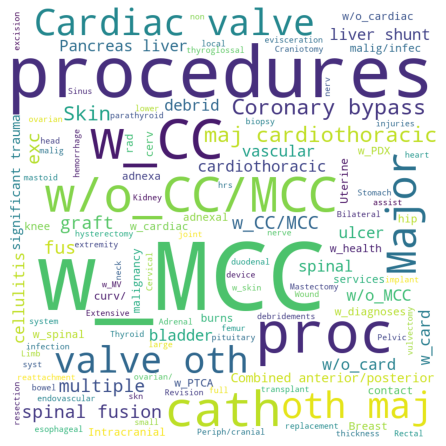

In [122]:
highcost=df1.loc[df1['Clusters'] == 'High-cost']
highcost.head()

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10,regexp=r"\w[\w/]+").generate(' '.join(highcost['DRG']))
  
# plot the WordCloud image                       
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [124]:
from collections import Counter
results = Counter()
highcost['DRG'].str.split().apply(results.update)
print(results)

Counter({'w_MCC': 26, 'procedures': 23, '&': 21, 'proc': 13, 'w_CC': 13, 'w/o_CC/MCC': 10, 'or': 10, 'cath': 10, 'for': 10, 'cardiothoracic': 9, 'Other': 8, 'Cardiac': 6, 'valve': 6, 'oth': 6, 'maj': 6, 'Coronary': 6, 'bypass': 6, 'Major': 5, 'of': 5, 'other': 4, 'w_CC/MCC': 4, 'spinal': 4, 'fusion': 4, 'fus': 4, 'exc': 4, 'multiple': 4, 'graft': 4, 'O.R.': 4, 'vascular': 3, 'Spinal': 3, 'w_card': 3, 'w/o_card': 3, 'w/o_MCC': 3, 'Pancreas,': 3, 'liver': 3, 'shunt': 3, 'Combined': 3, 'anterior/posterior': 3, 'Skin': 3, '&/or': 3, 'debrid': 3, 'ulcer': 3, 'cellulitis': 3, 'bladder': 3, 'significant': 3, 'trauma': 3, 'major': 2, 'w_PTCA': 2, 'w_cardiac': 2, 'w/o_cardiac': 2, 'cerv': 2, 'w_spinal': 2, 'curv/': 2, 'malig/infec': 2, '9+': 2, 'hip': 2, 'skin': 2, 'malignancy': 2, 'rad': 2, 'adnexal': 2, 'burns': 2, 'w_diagnoses': 2, 'contact': 2, 'w_health': 2, 'services': 2, 'Intracranial': 1, 'w_PDX': 1, 'hemorrhage': 1, 'Craniotomy': 1, 'endovascular': 1, 'intracranial': 1, '..............

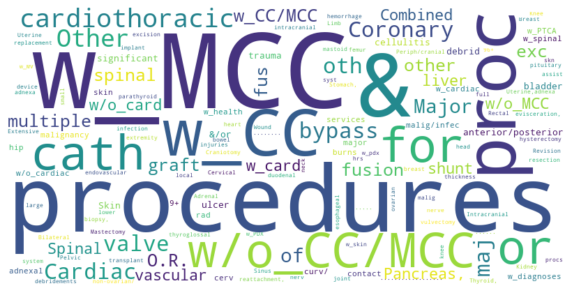

In [129]:
wc = WordCloud(width=800, height=400, max_words=200,background_color ='white',).generate_from_frequencies(results)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

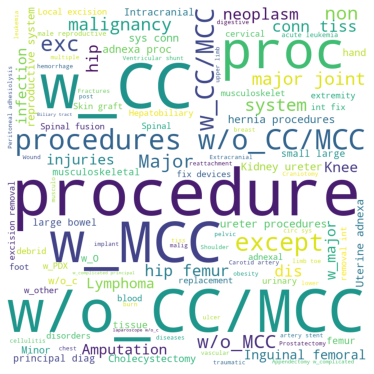

In [133]:
midcost=df1.loc[df1['Clusters'] == 'Mid-cost']


wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10,regexp=r"\w[\w/]+").generate(' '.join(midcost['DRG']))
  
# plot the WordCloud image                       
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [134]:
from collections import Counter
results = Counter()
midcost['DRG'].str.split().apply(results.update)
print(results)

Counter({'&': 96, 'procedures': 86, 'w/o_CC/MCC': 77, 'w_CC': 57, 'w_MCC': 47, 'proc': 41, 'O.R.': 38, 'for': 37, 'Other': 30, 'or': 29, 'w_CC/MCC': 20, 'of': 20, 'except': 19, 'system': 15, 'Major': 12, 'exc': 12, 'procedure': 11, 'w/o_MCC': 10, 'joint': 10, 'tiss': 10, 'sys': 9, 'w/o_c.d.e.': 8, 'conn': 8, 'tissue': 8, 'femur': 8, 'major': 7, 'debrid': 7, 'dis': 7, 'hip': 7, 'leukemia': 7, 'w_major': 6, 'Amputation': 6, 'femoral': 6, 'malignancy': 6, 'Kidney': 6, 'ureter': 6, 'male': 6, 'reproductive': 6, 'Lymphoma': 6, 'injuries': 6, 'Spinal': 5, 'small': 5, 'large': 5, 'bowel': 5, 'Appendectomy': 5, 'principal': 5, 'diag': 5, 'Minor': 5, 'tract': 5, 'Cholecystectomy': 5, 'skn': 5, 'musculoskeletal': 5, 'graft': 5, 'w_O.R.': 5, 'upper': 4, 'limb': 4, 'fusion': 4, 'extremity': 4, 'replacement': 4, 'Knee': 4, 'infection': 4, 'Local': 4, 'excision': 4, 'removal': 4, 'int': 4, 'fix': 4, 'devices': 4, 'musculoskelet': 4, 'Skin': 4, 'Uterine': 4, 'adnexa': 4, 'adnexal': 4, 'blood': 4, 'w_